In [38]:
# Import all the goods
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
plt.style.use('seaborn-whitegrid')

# Import the data files
xl_01 = pd.ExcelFile('SleepyHollow_Frequencies.xlsx')
all_data = xl_01.parse("Data")
all_data

,Paragraph Number,Paragraph Text,Word Count,Commas,Exclamation Points,Periods,Question Marks,Dashes,Semicolons,Quotations,...,"Commas, Central Line",Exclamation Points per word,Periods per word,"Periods, Central Line","Periods, Upper Limit","Periods, Lower Limit",Question Marks per word,Dashes per word,Semicolons per word,Quotations per word
0,1,In the bosom of one of those spacious coves wh...,211,16,0,6,0,0,1,0,...,0.087657,0.0,0.028,0.026457,0.059603,-0.006689,0.0,0.000,0.005,0.00
1,2,"I recollect that, when a stripling, my first e...",102,7,0,3,0,2,0,0,...,0.087657,0.0,0.029,0.026457,0.074130,-0.021216,0.0,0.020,0.000,0.00
2,3,"From the listless repose of the place, and the...",218,21,0,6,0,0,2,0,...,0.087657,0.0,0.028,0.026457,0.059066,-0.006152,0.0,0.000,0.009,0.00
3,4,"The dominant spirit, however, that haunts this...",203,19,0,4,0,3,0,0,...,0.087657,0.0,0.020,0.026457,0.060250,-0.007336,0.0,0.015,0.000,0.00
4,5,Such is the general purport of this legendary ...,43,2,0,1,0,0,1,0,...,0.087657,0.0,0.023,0.026457,0.099881,-0.046967,0.0,0.000,0.023,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,66,The next morning the old horse was found witho...,162,13,0,6,0,1,3,0,...,0.087657,0.0,0.037,0.026457,0.064285,-0.011371,0.0,0.006,0.019,0.00
66,67,"The brook was searched, but the body of the sc...",210,11,0,6,0,4,8,2,...,0.087657,0.0,0.029,0.026457,0.059682,-0.006768,0.0,0.019,0.038,0.01
67,68,The mysterious event caused much speculation a...,126,10,0,4,0,0,2,0,...,0.087657,0.0,0.032,0.026457,0.069350,-0.016436,0.0,0.000,0.016,0.00
68,69,"It is true, an old farmer, who had been down t...",177,10,0,2,0,0,9,0,...,0.087657,0.0,0.011,0.026457,0.062647,-0.009732,0.0,0.000,0.051,0.00


In [13]:
periods = all_data[['Paragraph Number', 'Word Count', 'Periods', 'Periods per word']]
periods

,Paragraph Number,Word Count,Periods,Periods per word
0,1,211,6,0.028
1,2,102,3,0.029
2,3,218,6,0.028
3,4,203,4,0.020
4,5,43,1,0.023
...,...,...,...,...
65,66,162,6,0.037
66,67,210,6,0.029
67,68,126,4,0.032
68,69,177,2,0.011


In [49]:
central_line = sum(periods['Periods per word'])/periods['Periods per word'].count()
central_line

0.026457142857142856

In [63]:
upper_limit = central_line + np.sqrt( (central_line * (1 - central_line)) / periods['Periods per word'])
upper_limit


0     0.985571
1     0.968889
2     0.985571
3     1.161296
4     1.084699
        ...   
65    0.860807
66    0.968889
67    0.923626
68    1.556673
69    1.084699
Name: Periods per word, Length: 70, dtype: float64

In [62]:
lower_limit = central_line - np.sqrt( (central_line * (1 - central_line)) / periods['Periods per word'])
lower_limit


0    -0.932656
1    -0.915975
2    -0.932656
3    -1.108381
4    -1.031785
        ...   
65   -0.807893
66   -0.915975
67   -0.870711
68   -1.503759
69   -1.031785
Name: Periods per word, Length: 70, dtype: float64

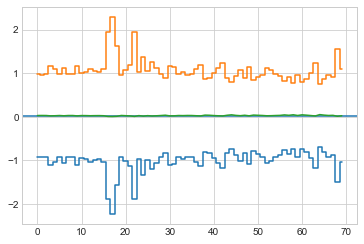

In [64]:
fig, ax = plt.subplots()

ax.step(lower_limit.index, lower_limit.values, where='mid')
ax.step(upper_limit.index, upper_limit.values, where='mid')
ax.axhline(central_line)
ax.plot(periods['Periods per word'])
#ax.set_ylim(-0.5, 0.5)